**Libraries**

In [81]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Markdown

<br><br>
**List from participants**

In [83]:
list_path = "/Users/victor/Desktop/LAB/participant_sheet.csv"
df = pd.read_csv(list_path)
df.head(5)

,Date,Time,First Name,Last Name,PID,Order,Researcher,Validation Quality,Notes,Participant Count,98
0,10/04/2022,1:00 PM,Logan,Reeves,PID001,ET-C,OH/JO,BAD,"Ran into and error during validation, program ...",NaN,NaN
1,10/06/2022,12:00 PM,Adriel,Grimsley,PID002,ET-G,JO,OKAY,"Calibration was not easy, but it seemed to wor...",ET Context count,42.0
2,10/06/2022,1:00 PM,Mikaela,Marquez,PID003,GC-A,OH/JO,OKAY,Calibration took a few tries but worked overal...,ET Ground count,38.0
3,10/06/2022,4:00 PM,Henry,Seaborne,PID004,GC-M,YQ/JO,GOOD,Calibration only took 2 tries. Validation was ...,GC Aper count,9.0
4,10/12/2022,9:00 AM,Jordan,Serrano-Guedea,PID005,ET-C,YQ/JO,OKAY,"Calibration and validation was good, fair/good...",GC Mask count,9.0


<br><br>
<h2>Selecting the ones from the Ground condition</h2>

In [84]:
df_ETG = df.loc[df["Order"] == "ET-G"]
df_ETG.head(5)

,Date,Time,First Name,Last Name,PID,Order,Researcher,Validation Quality,Notes,Participant Count,98
1,10/06/2022,12:00 PM,Adriel,Grimsley,PID002,ET-G,JO,OKAY,"Calibration was not easy, but it seemed to wor...",ET Context count,42.0
5,10/12/2022,10:00 AM,Botond,Bognar,PID006,ET-G,YQ/JO,GREAT,Calibration and validation were good; GOOD for...,E count,0.0
9,10/18/2022,9:00 AM,Bilma,Lazaro,PID010,ET-G,JO,OKAY,Calibration and validation was okay. Psychopy ...,NaN,NaN
14,10/19/2022,9:00 AM,Grace,Gonzalez,PID015,ET-G,OH/JO,BAD,Calibration was okat but validation was bad. P...,NaN,NaN
18,10/20/2022,9:00 AM,Angeline,Lorente,PID019,ET-G,JO,OKAY,Had some difficulty with calibration/validatio...,NaN,NaN


In [85]:
ground_participants = df_ETG[df_ETG["PID"] != "PID086"]["PID"]
ground_participants.head()

1     PID002
5     PID006
9     PID010
14    PID015
18    PID019
Name: PID, dtype: object

<br><br>
**Dataframe to list**

In [86]:
path = '/Users/victor/Desktop/LAB/ET Database'
my_list = ground_participants.tolist()

<br><br>
**Look into the details**

In [87]:
for subject in my_list:
    
    PID002 = pd.read_csv("/Users/victor/Desktop/LAB/ET Database/PID002/PID002_ground.csv")
    
    os.chdir(path + '/' + subject)
    print(os.listdir())

['PID002_gazePos.csv', '.DS_Store', 'PID002_drift.csv', 'PID002_ground.csv', 'PID002_roi.csv', 'PID002.txt']
['PID006_ground.csv', 'PID006_drift.csv', 'PID006_gazePos.csv', 'PID006.txt']
['PID010_drift.csv', 'PID010_ground.csv', 'PID010_gazePos.csv', 'PID010.txt']
['PID015_ground.csv', 'PID015.txt', 'PID015_gazePos.csv', 'PID015_drift.csv']
['PID019.txt', 'PID019_drift.csv', 'PID019_gazePos.csv', 'PID019_ground.csv']
['PID023.txt', 'PID023_drift.csv', 'PID023_gazePos.csv', 'PID023_ground.csv']
['PID027.txt', 'PID027_ground.csv', 'PID027_drift.csv', 'PID027_gazePos.csv']
['PID031_ground.csv', 'PID031_drift.csv', 'PID031.txt', 'PID031_gazePos.csv']
['PID035_gazePos.csv', 'PID035.txt', 'validation_01_02_2023_16_46.png', 'PID035_ground.csv', 'PID035_drift.csv']
['PID037.txt', 'PID037_drift.csv', 'PID037_ground.csv', 'PID037_gazePos.csv', 'validation_02_02_2023_17_31.png']
['PID039_ground.csv', 'PID039_gazePos.csv', 'PID039_drift.csv', 'PID039.txt']
['PID041.txt', 'PID041_drift.csv', 'PID04

<br><br>
<h2>Creating a dataframe with the arousal means</h2>

In [88]:
arousal_list = []
for subject in my_list:
    os.chdir(path + '/' + subject)
    df = pd.read_csv(subject + '_ground.csv', index_col=0)
    df_arousal = df.filter(regex='arousal')
    df_arousal_mean = df_arousal.mean(axis=0)
    arousal_list.append(df_arousal_mean)

df_arousal_mean = pd.concat(arousal_list, axis=1)
df_arousal_mean.columns = my_list
df_arousal_mean.head()

,PID002,PID006,PID010,PID015,PID019,PID023,PID027,PID031,PID035,PID037,...,PID075,PID077,PID079,PID081,PID088,PID090,PID092,PID094,PID096,PID098
012_arousal,0.077121,0.171001,-0.196264,-0.210420,0.030065,-0.189494,-0.024582,-0.049595,-0.012379,NaN,...,-0.156472,-0.405620,0.649479,-0.192838,-0.246809,-0.356906,-0.263809,0.163362,0.246470,-0.392160
004_arousal,0.280009,0.147320,-0.347606,0.189061,0.042926,0.043355,-0.221957,0.239482,0.244123,NaN,...,-0.098279,-0.375622,0.534428,-0.040774,-0.063933,-0.106092,-0.110877,0.449777,0.237766,-0.226142
022_arousal,-0.115191,0.384737,-0.121621,-0.286806,0.050057,-0.246719,0.249539,-0.547954,-0.038939,NaN,...,0.034395,-0.379436,-0.094417,-0.140331,-0.162318,-0.262932,-0.183093,-0.052045,-0.023977,-0.026500
018_arousal,-0.252179,0.026555,-0.066728,0.062777,-0.001362,-0.148953,0.085163,-0.371190,-0.248379,NaN,...,0.013066,-0.447444,0.039896,-0.421053,0.102238,-0.147361,-0.198950,0.021488,-0.289477,-0.351915
002_arousal,0.332751,-0.233071,0.123004,0.292354,0.084613,0.184526,0.295352,-0.090023,0.052187,NaN,...,0.014629,-0.101302,0.387342,-0.016430,-0.041905,-0.464522,-0.394303,0.263609,0.136489,0.425420


<br><br>
**Transposing for clarity**

In [89]:
arousal = df_arousal_mean.T
arousal.head()

,012_arousal,004_arousal,022_arousal,018_arousal,002_arousal,016_arousal,008_arousal,020_arousal,006_arousal,014_arousal,010_arousal
PID002,0.077121,0.280009,-0.115191,-0.252179,0.332751,0.022047,0.433102,0.394326,-0.274501,0.531971,0.029763
PID006,0.171001,0.147320,0.384737,0.026555,-0.233071,-0.003985,-0.045485,-0.085467,0.014843,-0.036501,-0.593968
PID010,-0.196264,-0.347606,-0.121621,-0.066728,0.123004,-0.012743,0.092929,0.109393,-0.263545,0.315632,0.009755
PID015,-0.210420,0.189061,-0.286806,0.062777,0.292354,0.209878,0.363493,-0.040170,-0.007916,0.272767,0.483815
PID019,0.030065,0.042926,0.050057,-0.001362,0.084613,-0.035757,0.223545,0.184044,-0.046312,0.127550,0.302272


<br><br>
**Re-sorting for clarity**

In [90]:
arousal = arousal.reindex(sorted(arousal.columns), axis=1)
arousal.head()

,002_arousal,004_arousal,006_arousal,008_arousal,010_arousal,012_arousal,014_arousal,016_arousal,018_arousal,020_arousal,022_arousal
PID002,0.332751,0.280009,-0.274501,0.433102,0.029763,0.077121,0.531971,0.022047,-0.252179,0.394326,-0.115191
PID006,-0.233071,0.147320,0.014843,-0.045485,-0.593968,0.171001,-0.036501,-0.003985,0.026555,-0.085467,0.384737
PID010,0.123004,-0.347606,-0.263545,0.092929,0.009755,-0.196264,0.315632,-0.012743,-0.066728,0.109393,-0.121621
PID015,0.292354,0.189061,-0.007916,0.363493,0.483815,-0.210420,0.272767,0.209878,0.062777,-0.040170,-0.286806
PID019,0.084613,0.042926,-0.046312,0.223545,0.302272,0.030065,0.127550,-0.035757,-0.001362,0.184044,0.050057


<br><br>
<h2>Now a dataframe with the valence means</h2>

In [91]:
valence_list = []
for subject in my_list:
    os.chdir(path + '/' + subject)
    df = pd.read_csv(subject + '_ground.csv', index_col=0)
    df_valence = df.filter(regex='valence')
    df_valence_mean = df_valence.mean(axis=0)
    valence_list.append(df_valence_mean)

df_valence_mean = pd.concat(valence_list, axis=1)
df_valence_mean.columns = my_list
df_valence_mean.head()

,PID002,PID006,PID010,PID015,PID019,PID023,PID027,PID031,PID035,PID037,...,PID075,PID077,PID079,PID081,PID088,PID090,PID092,PID094,PID096,PID098
012_valence,-0.133857,-0.028232,-0.032089,-0.135342,0.049974,-0.031826,0.012267,-0.011859,0.015830,NaN,...,0.063868,0.021240,0.374771,-0.435470,-0.181047,0.129931,-0.674912,-0.341221,-0.046506,-0.199111
004_valence,0.181887,-0.024468,-0.215776,-0.158457,0.075020,-0.257968,-0.128937,0.130510,-0.255044,NaN,...,0.073609,0.056353,0.147831,-0.145690,0.280181,-0.230829,-0.238429,-0.394550,0.051455,-0.291098
022_valence,0.494898,0.277173,0.303147,0.134860,0.348113,0.017040,0.388921,0.183891,0.219503,NaN,...,0.468983,0.366047,0.192900,0.362471,0.217161,0.490922,0.847099,0.402497,0.396303,-0.009579
018_valence,-0.138004,0.216356,0.170155,-0.356036,-0.069423,0.045443,-0.053804,-0.174358,-0.400998,NaN,...,0.030188,-0.244696,-0.022669,-0.041956,0.211728,-0.547003,-0.485603,-0.284462,-0.072200,-0.020104
002_valence,-0.153227,-0.175758,0.123473,0.190967,0.605261,0.158533,0.329132,-0.034822,0.535626,NaN,...,0.423244,0.419974,0.346910,0.130229,0.379608,0.070118,0.365946,0.045580,0.433043,0.453972


In [92]:
valence = df_valence_mean.T
valence.head()

,012_valence,004_valence,022_valence,018_valence,002_valence,016_valence,008_valence,020_valence,006_valence,014_valence,010_valence
PID002,-0.133857,0.181887,0.494898,-0.138004,-0.153227,-0.293846,0.066880,-0.565166,0.317347,-0.447352,-0.404832
PID006,-0.028232,-0.024468,0.277173,0.216356,-0.175758,0.097943,0.095580,-0.424909,0.423571,-0.534358,-0.383777
PID010,-0.032089,-0.215776,0.303147,0.170155,0.123473,-0.044665,0.148265,-0.430247,-0.134605,-0.433998,-0.038389
PID015,-0.135342,-0.158457,0.134860,-0.356036,0.190967,-0.120776,-0.002791,-0.420297,-0.160546,-0.434020,-0.508464
PID019,0.049974,0.075020,0.348113,-0.069423,0.605261,0.171383,0.063248,-0.483588,0.484768,-0.071378,-0.255548


In [93]:
valence = valence.reindex(sorted(valence.columns), axis=1)
valence.head()

,002_valence,004_valence,006_valence,008_valence,010_valence,012_valence,014_valence,016_valence,018_valence,020_valence,022_valence
PID002,-0.153227,0.181887,0.317347,0.066880,-0.404832,-0.133857,-0.447352,-0.293846,-0.138004,-0.565166,0.494898
PID006,-0.175758,-0.024468,0.423571,0.095580,-0.383777,-0.028232,-0.534358,0.097943,0.216356,-0.424909,0.277173
PID010,0.123473,-0.215776,-0.134605,0.148265,-0.038389,-0.032089,-0.433998,-0.044665,0.170155,-0.430247,0.303147
PID015,0.190967,-0.158457,-0.160546,-0.002791,-0.508464,-0.135342,-0.434020,-0.120776,-0.356036,-0.420297,0.134860
PID019,0.605261,0.075020,0.484768,0.063248,-0.255548,0.049974,-0.071378,0.171383,-0.069423,-0.483588,0.348113


<br><br><h2>Merging the Dataframes</h2>

In [94]:
merged = pd.concat([arousal, valence], axis=1)
merged = merged.reindex(sorted(df.columns), axis=1)
merged.head()

,002_arousal,002_valence,004_arousal,004_valence,006_arousal,006_valence,008_arousal,008_valence,010_arousal,010_valence,...,014_arousal,014_valence,016_arousal,016_valence,018_arousal,018_valence,020_arousal,020_valence,022_arousal,022_valence
PID002,0.332751,-0.153227,0.280009,0.181887,-0.274501,0.317347,0.433102,0.066880,0.029763,-0.404832,...,0.531971,-0.447352,0.022047,-0.293846,-0.252179,-0.138004,0.394326,-0.565166,-0.115191,0.494898
PID006,-0.233071,-0.175758,0.147320,-0.024468,0.014843,0.423571,-0.045485,0.095580,-0.593968,-0.383777,...,-0.036501,-0.534358,-0.003985,0.097943,0.026555,0.216356,-0.085467,-0.424909,0.384737,0.277173
PID010,0.123004,0.123473,-0.347606,-0.215776,-0.263545,-0.134605,0.092929,0.148265,0.009755,-0.038389,...,0.315632,-0.433998,-0.012743,-0.044665,-0.066728,0.170155,0.109393,-0.430247,-0.121621,0.303147
PID015,0.292354,0.190967,0.189061,-0.158457,-0.007916,-0.160546,0.363493,-0.002791,0.483815,-0.508464,...,0.272767,-0.434020,0.209878,-0.120776,0.062777,-0.356036,-0.040170,-0.420297,-0.286806,0.134860
PID019,0.084613,0.605261,0.042926,0.075020,-0.046312,0.484768,0.223545,0.063248,0.302272,-0.255548,...,0.127550,-0.071378,-0.035757,0.171383,-0.001362,-0.069423,0.184044,-0.483588,0.050057,0.348113


<h3>Voilà...</h3>
<br><br>

<br><br><h1>Now, the blinks</h1>

In [95]:
blink = pd.read_csv("/Users/victor/Desktop/LAB/ET Database/PID002/PID002_gazePos.csv", index_col=0)
blink.head()

,012_gazeX,012_gazeY,012_pupilSize,004_gazeX,004_gazeY,004_pupilSize,022_gazeX,022_gazeY,022_pupilSize,018_gazeX,...,020_pupilSize,006_gazeX,006_gazeY,006_pupilSize,014_gazeX,014_gazeY,014_pupilSize,010_gazeX,010_gazeY,010_pupilSize
0,0.162305,-0.095312,4368.0,0.127344,-0.126758,4136.0,0.120801,-0.221387,3885.0,0.312402,...,2666.0,-0.102539,-0.248730,2234.0,-0.379785,-0.294141,2512.0,-0.252441,-0.239453,2069.0
1,0.163477,-0.094434,4389.0,0.131348,-0.133594,4169.0,0.128906,-0.216699,3926.0,0.145117,...,2683.0,-0.100586,-0.252051,2246.0,-0.384863,-0.295117,2510.0,-0.239062,-0.243066,2074.0
2,0.166602,-0.087695,4415.0,0.133594,-0.137598,4179.0,0.134180,-0.213770,3930.0,0.062012,...,2692.0,-0.099414,-0.255566,2269.0,-0.383789,-0.296191,5377.0,-0.234668,-0.243652,2079.0
3,0.168262,-0.081641,4419.0,0.124609,-0.115332,4152.0,0.138086,-0.215137,3929.0,0.065039,...,2707.0,-0.097852,-0.256934,2272.0,-0.380859,-0.295801,2531.0,-0.228125,-0.241309,2105.0
4,0.163574,-0.086328,4413.0,0.125293,-0.099902,4159.0,0.135840,-0.214648,3936.0,0.061816,...,2715.0,-0.096973,-0.254492,2266.0,-0.380469,-0.295703,2528.0,-0.227930,-0.245117,2098.0


<br><br>**Selecting the pupil size only**

In [96]:
blink_pupilSize = blink.filter(regex='pupilSize')
blink_pupilSize.head()

,012_pupilSize,004_pupilSize,022_pupilSize,018_pupilSize,002_pupilSize,016_pupilSize,008_pupilSize,020_pupilSize,006_pupilSize,014_pupilSize,010_pupilSize
0,4368.0,4136.0,3885.0,3472.0,3086.0,2944.0,2873.0,2666.0,2234.0,2512.0,2069.0
1,4389.0,4169.0,3926.0,3505.0,3074.0,2945.0,2874.0,2683.0,2246.0,2510.0,2074.0
2,4415.0,4179.0,3930.0,3442.0,3085.0,2906.0,2874.0,2692.0,2269.0,5377.0,2079.0
3,4419.0,4152.0,3929.0,3457.0,3103.0,2929.0,2862.0,2707.0,2272.0,2531.0,2105.0
4,4413.0,4159.0,3936.0,3485.0,3118.0,2939.0,2854.0,2715.0,2266.0,2528.0,2098.0


<br><br><h3>Defining a blink-counter function</h3> 

In [97]:
def blink_counter(df):
    blink_list = []
    for column in df:
        blink_count = 0
        blink = 0
        for row in df[column]:
            if row == 9999:
                blink_count += 1
            else:
                if blink_count >= 6 and blink_count <= 24:
                    blink += 1
                blink_count = 0
        blink_list.append(blink)
    df_blink = pd.DataFrame(blink_list, index=df.columns, columns=['Blinks'])
    return df_blink


#Old Function
    #blink_list = []
    #for column in df:
    #    blink = 0
    #    for i in range(len(df[column])):
    #        if df[column][i] == 9999 and df[column][i-1] == 9999 and df[column][i-2] == 9999:
    #            blink += 1
    #    blink_list.append(blink)
    #blink_df = pd.DataFrame(blink_list, index=df.columns, columns=['Blinks'])
    #return blink_df

#Transpose
blink_counter(blink_pupilSize).T

,012_pupilSize,004_pupilSize,022_pupilSize,018_pupilSize,002_pupilSize,016_pupilSize,008_pupilSize,020_pupilSize,006_pupilSize,014_pupilSize,010_pupilSize
Blinks,0,0,0,0,0,0,0,0,2,0,6


<br><br><h3>Counting the blinks for the entire dataset</h3>

In [98]:
blink_list = []
for subject in my_list:
    os.chdir(path + '/' + subject)
    df = pd.read_csv(subject + '_gazePos.csv')
    df_pupilSize = df.filter(regex='pupilSize')
    df_blink = blink_counter(df_pupilSize)
    blink_list.append(df_blink)
    
#Case for if and only 

df_blink = pd.concat(blink_list, axis=1)
df_blink.columns = my_list
df_blink.head()

,PID002,PID006,PID010,PID015,PID019,PID023,PID027,PID031,PID035,PID037,...,PID075,PID077,PID079,PID081,PID088,PID090,PID092,PID094,PID096,PID098
012_pupilSize,0,0,0,2,0,0,4,0,0,0,...,4,0,15,0,5,0,0,3,7,0
004_pupilSize,0,0,1,0,0,0,1,0,0,0,...,10,0,24,0,9,0,0,4,7,1
022_pupilSize,0,0,1,1,1,0,1,0,0,0,...,0,0,1,0,15,0,0,5,17,0
018_pupilSize,0,0,0,1,2,0,1,0,0,0,...,6,0,13,0,4,0,0,2,24,0
002_pupilSize,0,0,1,0,0,0,1,0,0,0,...,17,0,22,0,1,0,0,3,0,1


<br><br>**Transposing the rows**

In [99]:
blink = df_blink.T
blink.head()

,012_pupilSize,004_pupilSize,022_pupilSize,018_pupilSize,002_pupilSize,016_pupilSize,008_pupilSize,020_pupilSize,006_pupilSize,014_pupilSize,010_pupilSize
PID002,0,0,0,0,0,0,0,0,2,0,6
PID006,0,0,0,0,0,0,0,0,0,0,0
PID010,0,1,1,0,1,0,1,0,0,0,0
PID015,2,0,1,1,0,0,0,2,0,1,0
PID019,0,0,1,2,0,0,0,0,0,1,1


<br><br>**Ordering for simplicity**

In [100]:
blink = blink.reindex(sorted(blink.columns), axis=1)
blink.head()

,002_pupilSize,004_pupilSize,006_pupilSize,008_pupilSize,010_pupilSize,012_pupilSize,014_pupilSize,016_pupilSize,018_pupilSize,020_pupilSize,022_pupilSize
PID002,0,0,2,0,6,0,0,0,0,0,0
PID006,0,0,0,0,0,0,0,0,0,0,0
PID010,1,1,0,1,0,0,0,0,0,0,1
PID015,0,0,0,0,0,2,1,0,1,2,1
PID019,0,0,0,0,1,0,1,0,2,0,1


<br><br>**Renaming "pupilSize" by "#blinks"**

In [101]:
blink.columns = blink.columns.str.replace('_pupilSize', '_#blinks')
blink.head()

,002_#blinks,004_#blinks,006_#blinks,008_#blinks,010_#blinks,012_#blinks,014_#blinks,016_#blinks,018_#blinks,020_#blinks,022_#blinks
PID002,0,0,2,0,6,0,0,0,0,0,0
PID006,0,0,0,0,0,0,0,0,0,0,0
PID010,1,1,0,1,0,0,0,0,0,0,1
PID015,0,0,0,0,0,2,1,0,1,2,1
PID019,0,0,0,0,1,0,1,0,2,0,1


<br><br><h3>Merge both tables again</h3>

In [102]:
merged = pd.concat([merged, blink], axis=1)
merged.head()

,002_arousal,002_valence,004_arousal,004_valence,006_arousal,006_valence,008_arousal,008_valence,010_arousal,010_valence,...,004_#blinks,006_#blinks,008_#blinks,010_#blinks,012_#blinks,014_#blinks,016_#blinks,018_#blinks,020_#blinks,022_#blinks
PID002,0.332751,-0.153227,0.280009,0.181887,-0.274501,0.317347,0.433102,0.066880,0.029763,-0.404832,...,0,2,0,6,0,0,0,0,0,0
PID006,-0.233071,-0.175758,0.147320,-0.024468,0.014843,0.423571,-0.045485,0.095580,-0.593968,-0.383777,...,0,0,0,0,0,0,0,0,0,0
PID010,0.123004,0.123473,-0.347606,-0.215776,-0.263545,-0.134605,0.092929,0.148265,0.009755,-0.038389,...,1,0,1,0,0,0,0,0,0,1
PID015,0.292354,0.190967,0.189061,-0.158457,-0.007916,-0.160546,0.363493,-0.002791,0.483815,-0.508464,...,0,0,0,0,2,1,0,1,2,1
PID019,0.084613,0.605261,0.042926,0.075020,-0.046312,0.484768,0.223545,0.063248,0.302272,-0.255548,...,0,0,0,1,0,1,0,2,0,1


<br><br>**And sort**

In [103]:
merged = merged.reindex(sorted(merged.columns), axis=1)
merged.head()

,002_#blinks,002_arousal,002_valence,004_#blinks,004_arousal,004_valence,006_#blinks,006_arousal,006_valence,008_#blinks,...,016_valence,018_#blinks,018_arousal,018_valence,020_#blinks,020_arousal,020_valence,022_#blinks,022_arousal,022_valence
PID002,0,0.332751,-0.153227,0,0.280009,0.181887,2,-0.274501,0.317347,0,...,-0.293846,0,-0.252179,-0.138004,0,0.394326,-0.565166,0,-0.115191,0.494898
PID006,0,-0.233071,-0.175758,0,0.147320,-0.024468,0,0.014843,0.423571,0,...,0.097943,0,0.026555,0.216356,0,-0.085467,-0.424909,0,0.384737,0.277173
PID010,1,0.123004,0.123473,1,-0.347606,-0.215776,0,-0.263545,-0.134605,1,...,-0.044665,0,-0.066728,0.170155,0,0.109393,-0.430247,1,-0.121621,0.303147
PID015,0,0.292354,0.190967,0,0.189061,-0.158457,0,-0.007916,-0.160546,0,...,-0.120776,1,0.062777,-0.356036,2,-0.040170,-0.420297,1,-0.286806,0.134860
PID019,0,0.084613,0.605261,0,0.042926,0.075020,0,-0.046312,0.484768,0,...,0.171383,2,-0.001362,-0.069423,0,0.184044,-0.483588,1,0.050057,0.348113


<br><br>**Replacing NaN values with zeroes**

In [104]:
merged = merged.fillna(0)
merged.head()

,002_#blinks,002_arousal,002_valence,004_#blinks,004_arousal,004_valence,006_#blinks,006_arousal,006_valence,008_#blinks,...,016_valence,018_#blinks,018_arousal,018_valence,020_#blinks,020_arousal,020_valence,022_#blinks,022_arousal,022_valence
PID002,0,0.332751,-0.153227,0,0.280009,0.181887,2,-0.274501,0.317347,0,...,-0.293846,0,-0.252179,-0.138004,0,0.394326,-0.565166,0,-0.115191,0.494898
PID006,0,-0.233071,-0.175758,0,0.147320,-0.024468,0,0.014843,0.423571,0,...,0.097943,0,0.026555,0.216356,0,-0.085467,-0.424909,0,0.384737,0.277173
PID010,1,0.123004,0.123473,1,-0.347606,-0.215776,0,-0.263545,-0.134605,1,...,-0.044665,0,-0.066728,0.170155,0,0.109393,-0.430247,1,-0.121621,0.303147
PID015,0,0.292354,0.190967,0,0.189061,-0.158457,0,-0.007916,-0.160546,0,...,-0.120776,1,0.062777,-0.356036,2,-0.040170,-0.420297,1,-0.286806,0.134860
PID019,0,0.084613,0.605261,0,0.042926,0.075020,0,-0.046312,0.484768,0,...,0.171383,2,-0.001362,-0.069423,0,0.184044,-0.483588,1,0.050057,0.348113


<br><br><h2>Visualizations</h2>

***arousal***

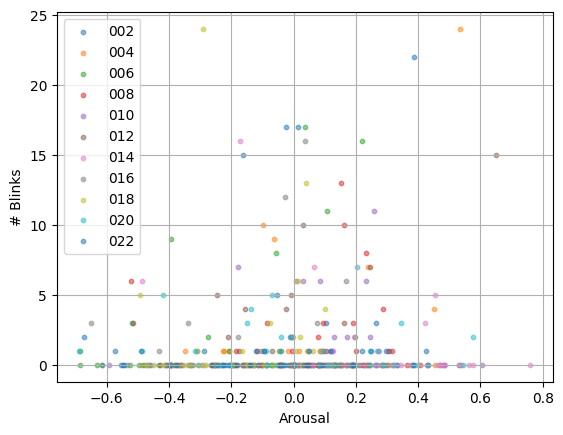

In [105]:
def plot_blinks_vs_arousal(merged):
    for column in merged:
        if column.endswith('_arousal'):
            instance = column.replace('_arousal', '')
            plt.scatter(merged[instance + '_arousal'], merged[instance + '_#blinks'], label=instance, s=10, alpha=0.5)
            plt.xlabel('Arousal')
            plt.ylabel('# Blinks')
            plt.legend()
            plt.grid()
            
    plt.show()

plot_blinks_vs_arousal(merged)

**Select the columns**

***Arousal***

In [106]:
merged_plot_arousal = merged.filter(regex='_arousal|_#blinks')
merged_plot_arousal.head()

,002_#blinks,002_arousal,004_#blinks,004_arousal,006_#blinks,006_arousal,008_#blinks,008_arousal,010_#blinks,010_arousal,...,014_#blinks,014_arousal,016_#blinks,016_arousal,018_#blinks,018_arousal,020_#blinks,020_arousal,022_#blinks,022_arousal
PID002,0,0.332751,0,0.280009,2,-0.274501,0,0.433102,6,0.029763,...,0,0.531971,0,0.022047,0,-0.252179,0,0.394326,0,-0.115191
PID006,0,-0.233071,0,0.147320,0,0.014843,0,-0.045485,0,-0.593968,...,0,-0.036501,0,-0.003985,0,0.026555,0,-0.085467,0,0.384737
PID010,1,0.123004,1,-0.347606,0,-0.263545,1,0.092929,0,0.009755,...,0,0.315632,0,-0.012743,0,-0.066728,0,0.109393,1,-0.121621
PID015,0,0.292354,0,0.189061,0,-0.007916,0,0.363493,0,0.483815,...,1,0.272767,0,0.209878,1,0.062777,2,-0.040170,1,-0.286806
PID019,0,0.084613,0,0.042926,0,-0.046312,0,0.223545,1,0.302272,...,1,0.127550,0,-0.035757,2,-0.001362,0,0.184044,1,0.050057


***Valence***

In [107]:
merged_plot_valence = merged.filter(regex='_valence|_#blinks')
merged_plot_valence.head()

,002_#blinks,002_valence,004_#blinks,004_valence,006_#blinks,006_valence,008_#blinks,008_valence,010_#blinks,010_valence,...,014_#blinks,014_valence,016_#blinks,016_valence,018_#blinks,018_valence,020_#blinks,020_valence,022_#blinks,022_valence
PID002,0,-0.153227,0,0.181887,2,0.317347,0,0.066880,6,-0.404832,...,0,-0.447352,0,-0.293846,0,-0.138004,0,-0.565166,0,0.494898
PID006,0,-0.175758,0,-0.024468,0,0.423571,0,0.095580,0,-0.383777,...,0,-0.534358,0,0.097943,0,0.216356,0,-0.424909,0,0.277173
PID010,1,0.123473,1,-0.215776,0,-0.134605,1,0.148265,0,-0.038389,...,0,-0.433998,0,-0.044665,0,0.170155,0,-0.430247,1,0.303147
PID015,0,0.190967,0,-0.158457,0,-0.160546,0,-0.002791,0,-0.508464,...,1,-0.434020,0,-0.120776,1,-0.356036,2,-0.420297,1,0.134860
PID019,0,0.605261,0,0.075020,0,0.484768,0,0.063248,1,-0.255548,...,1,-0.071378,0,0.171383,2,-0.069423,0,-0.483588,1,0.348113


<h3>Individual Plots</h3>

***Arousal***

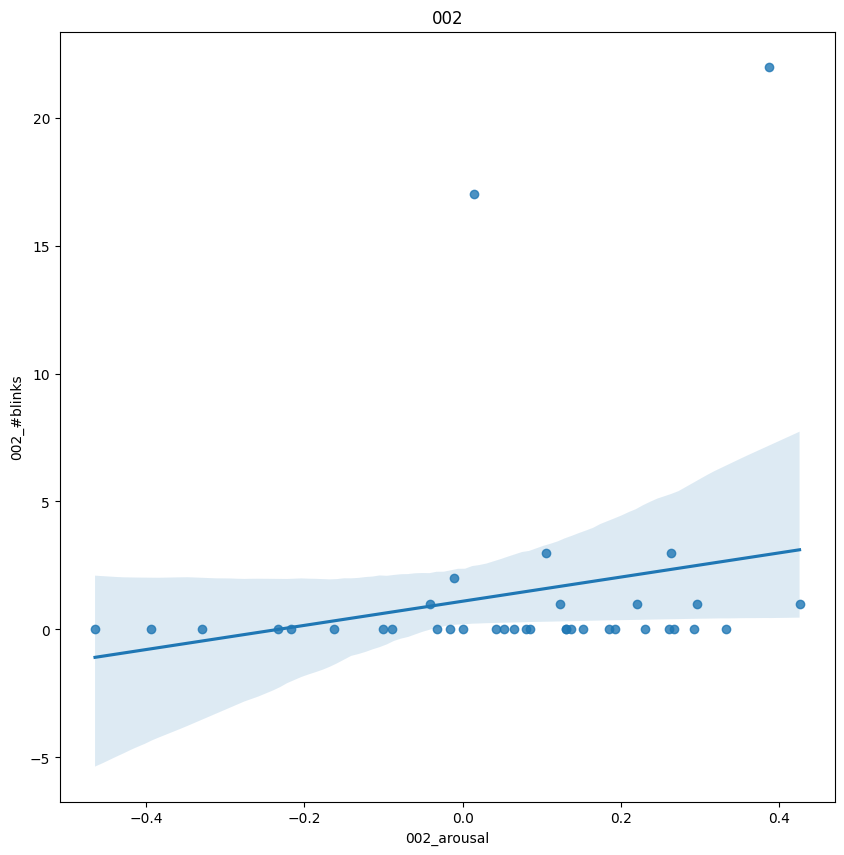

Corref 0.22141662488040112
P-Value 0.291148474217634


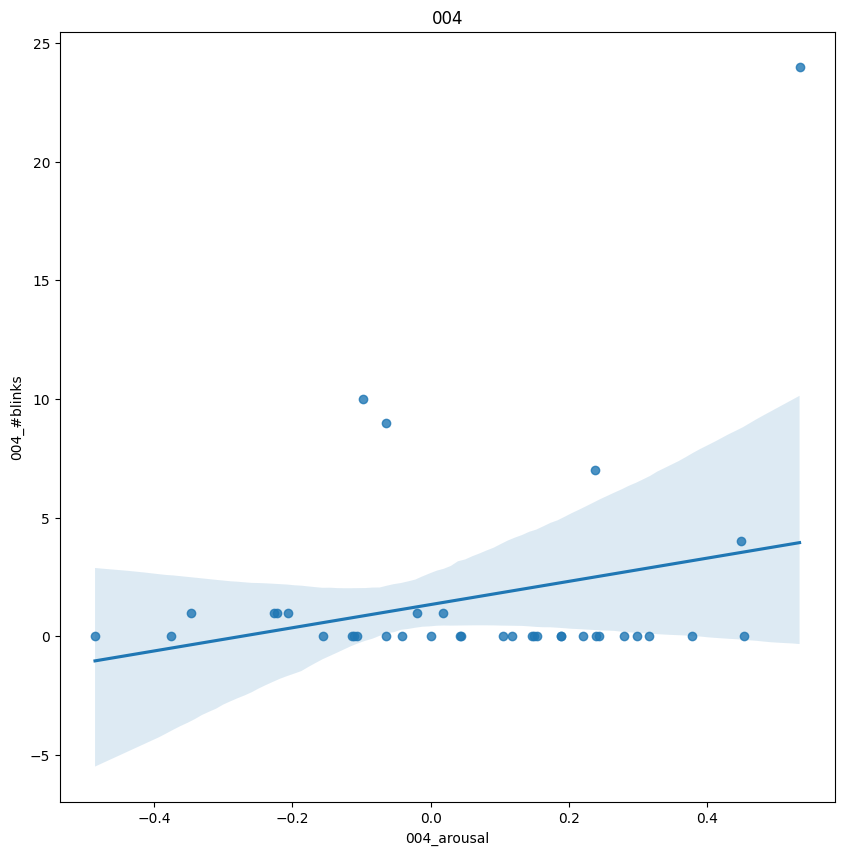

Corref 0.261111062929004
P-Value -0.12167616252291417


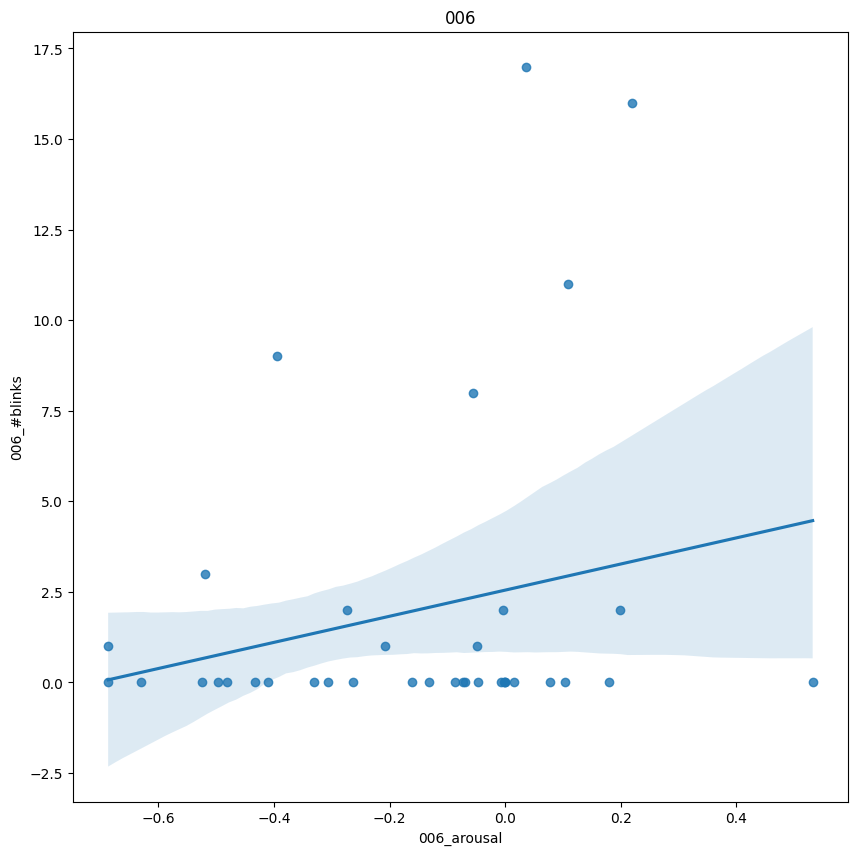

Corref 0.2311474438523353
P-Value 0.15801987114073127


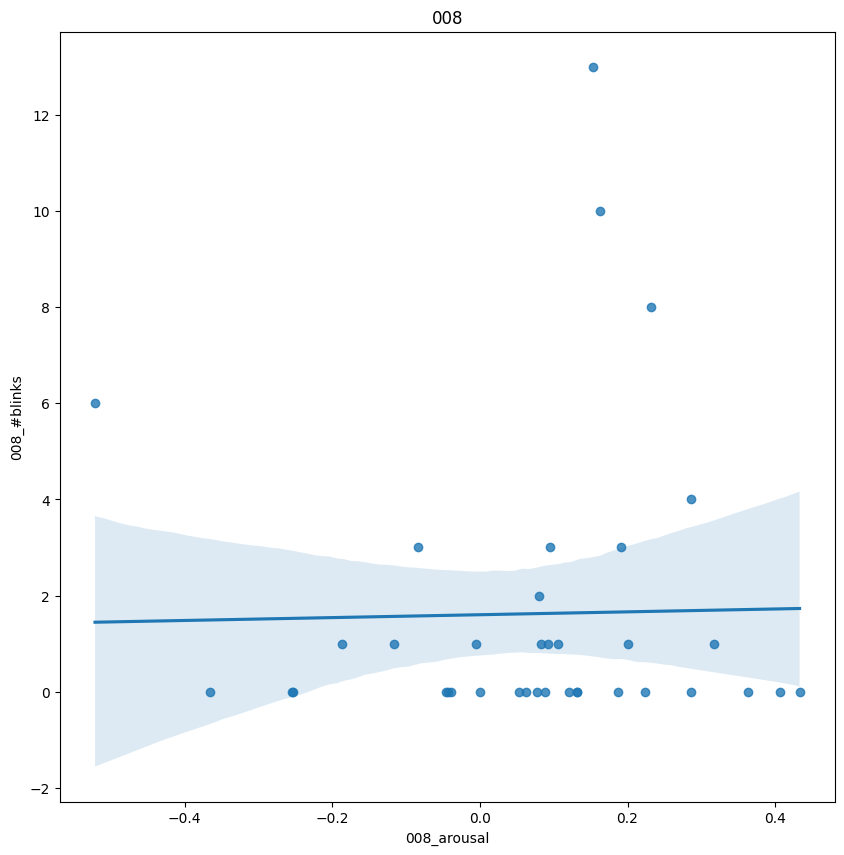

Corref 0.020472891303676553
P-Value 0.07459967319460806


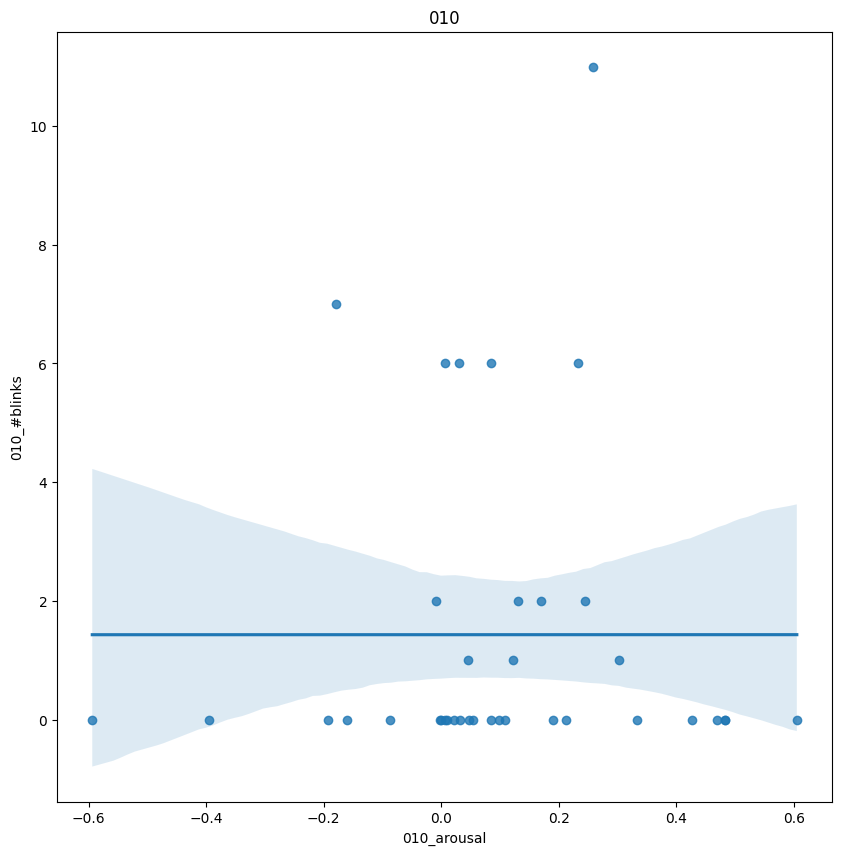

Corref 5.4589747888114904e-05
P-Value 0.050831497722083466


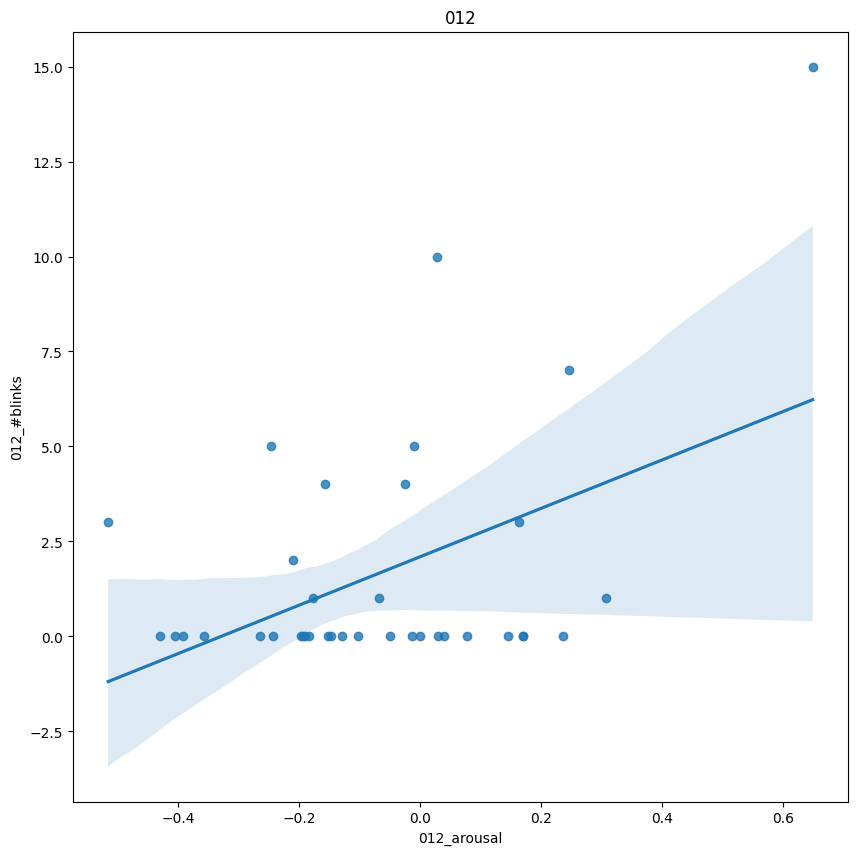

Corref 0.4592641801670824
P-Value 0.1997061060459274


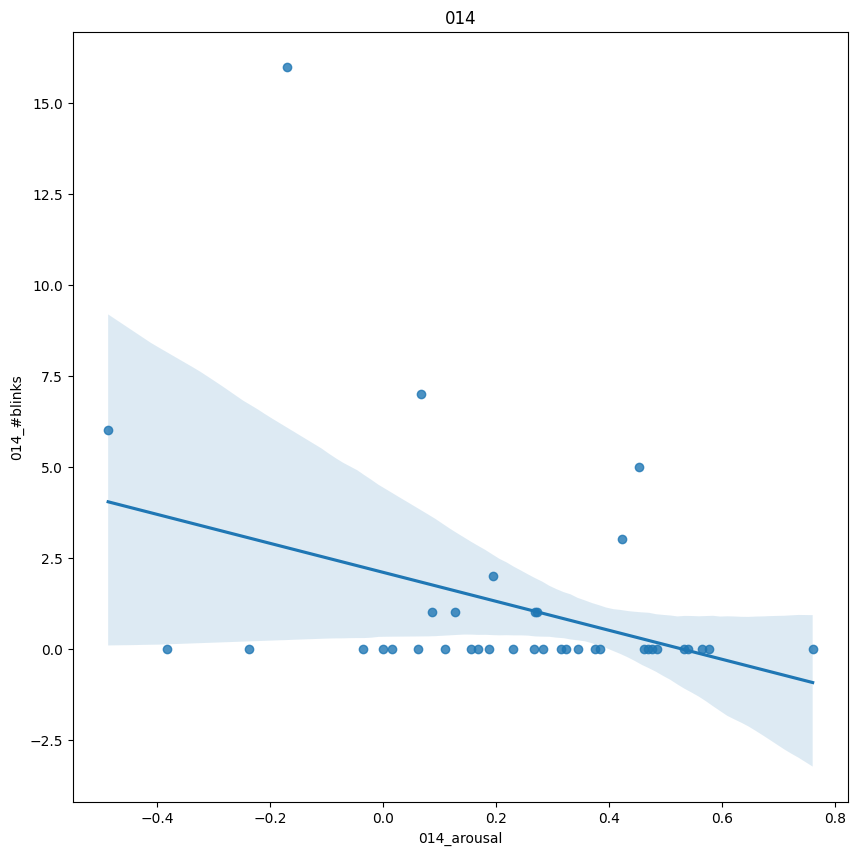

Corref -0.3557785254462658
P-Value -0.2723281607061092


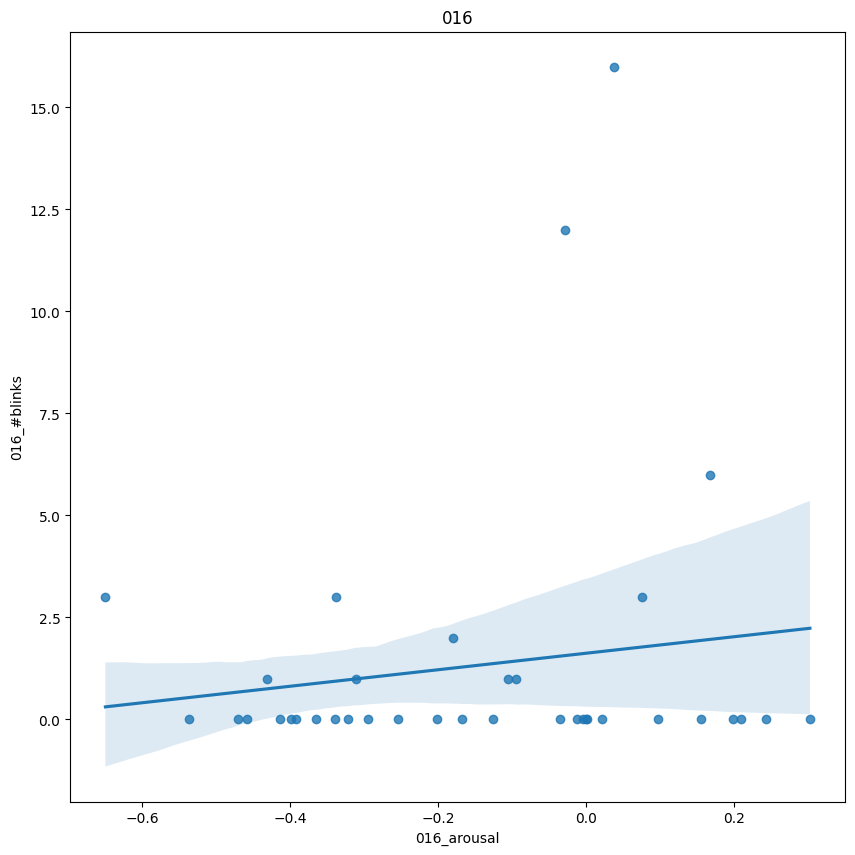

Corref 0.14806491344004796
P-Value 0.012775799827127931


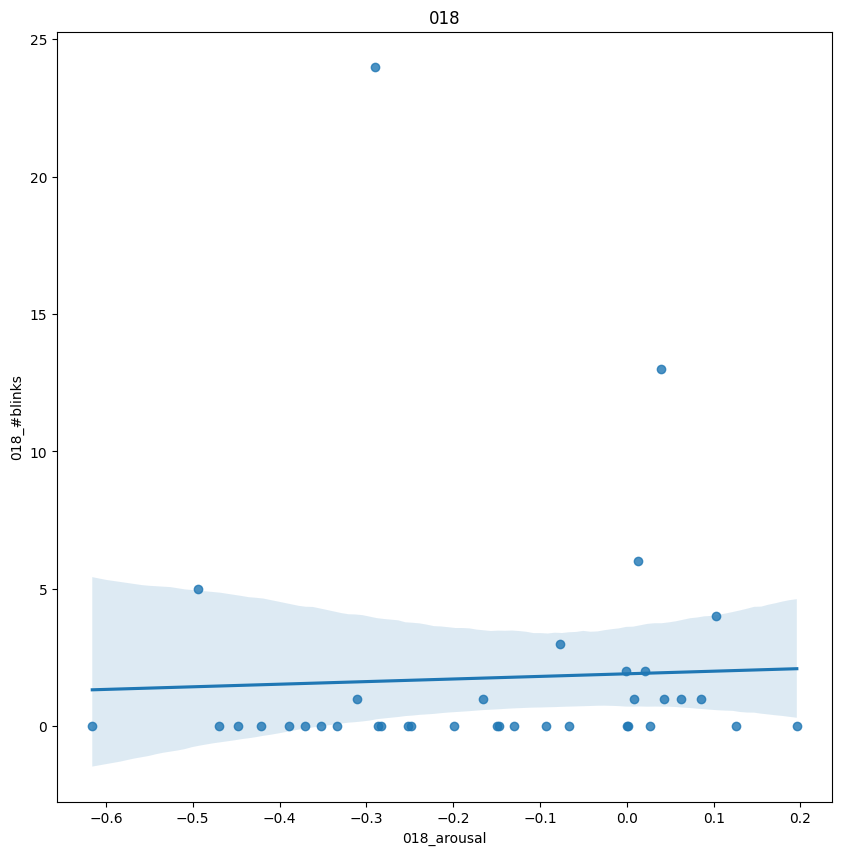

Corref 0.04301545577519439
P-Value 0.31633376122706747


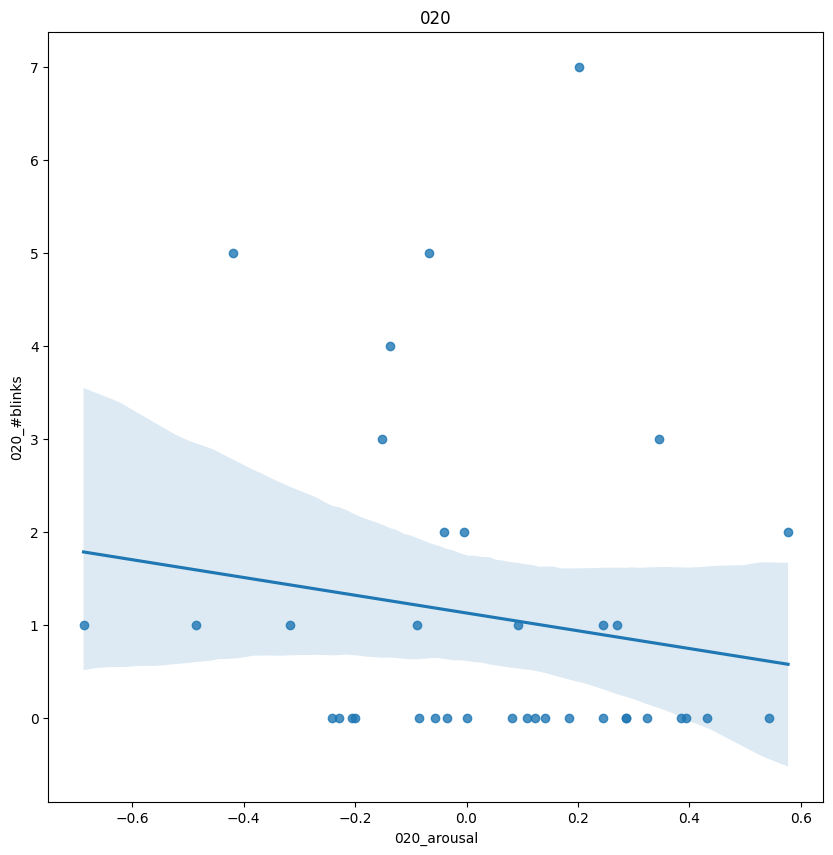

Corref -0.15838123174870256
P-Value -0.22586989585477438


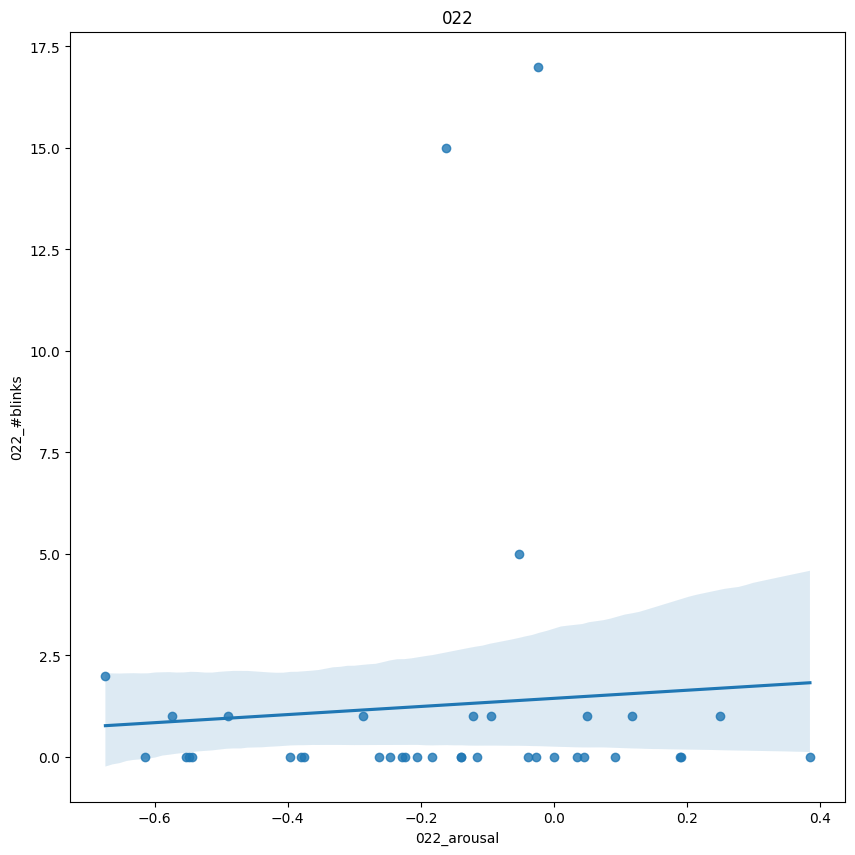

Corref 0.07072345631427825
P-Value 0.03316150678275388


In [108]:
def plot_correlation_arousal(merged_plot):
    for column in merged_plot:
        if column.endswith('_arousal'):
            plt.figure(figsize=(10, 10))
            sns.regplot(x=column, y=column.replace('_arousal', '_#blinks'), data=merged_plot)
            plt.title(column.replace('_arousal', ''))
            plt.show()
            print("Corref", merged_plot[column].corr(merged_plot[column.replace('_arousal', '_#blinks')]))
            print("P-Value", merged_plot[column].corr(merged_plot[column.replace('_arousal', '_#blinks')], method='spearman'))

plot_correlation_arousal(merged_plot_arousal)

***Valence***

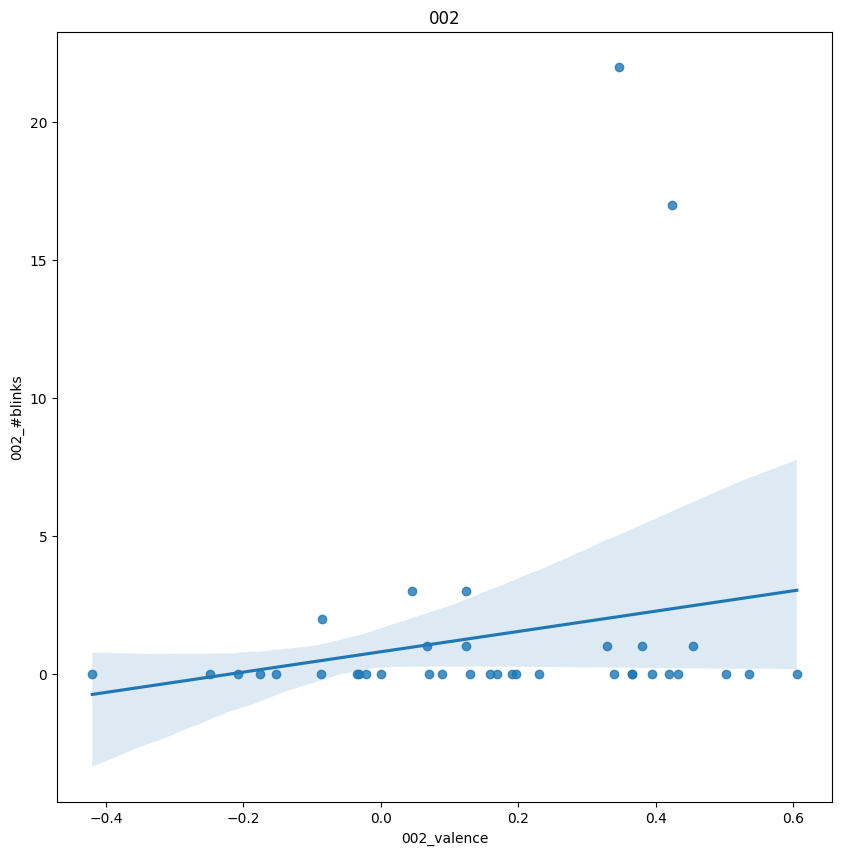

Corref 0.20188869520033784
P-Value 0.1125409595176144


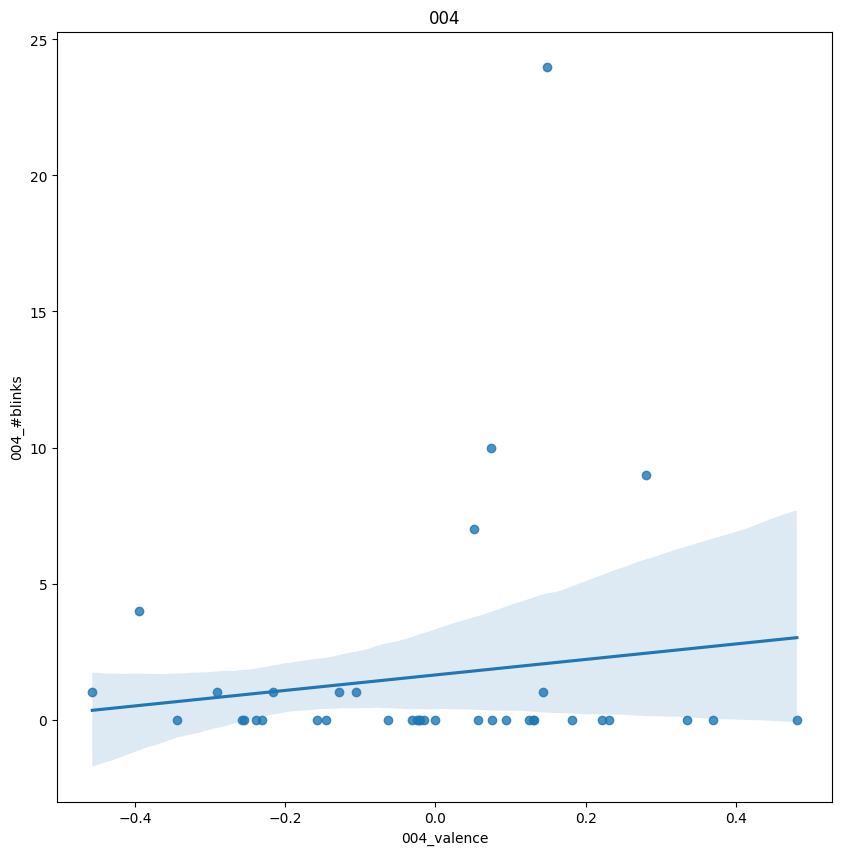

Corref 0.139176269195755
P-Value -0.10460913126214266


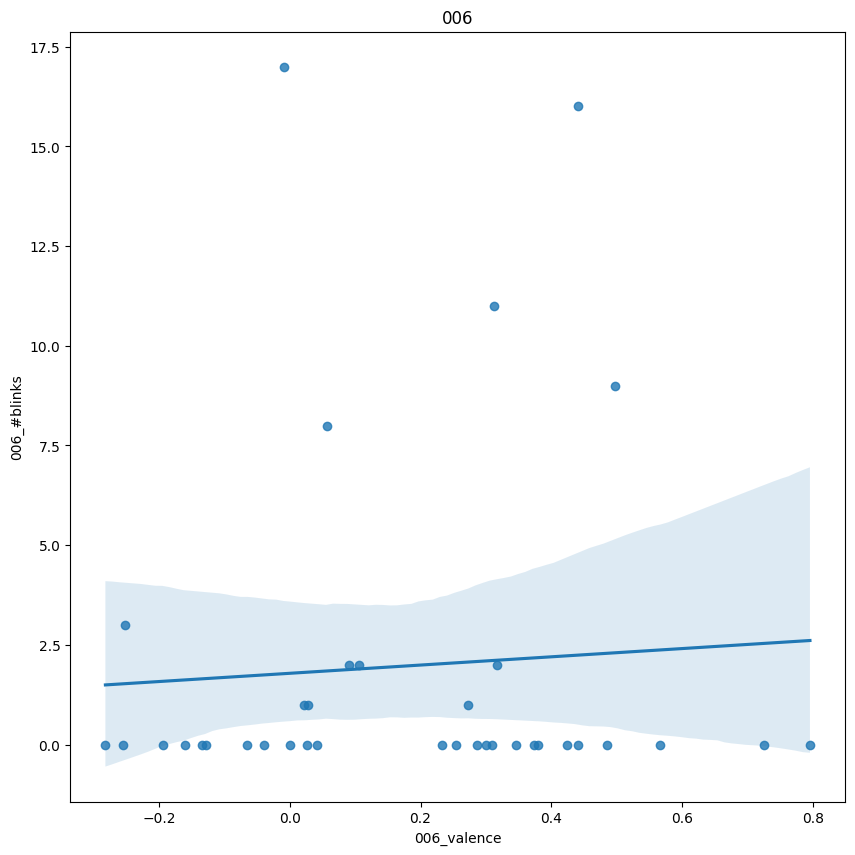

Corref 0.06517468371149399
P-Value 0.0268120358975248


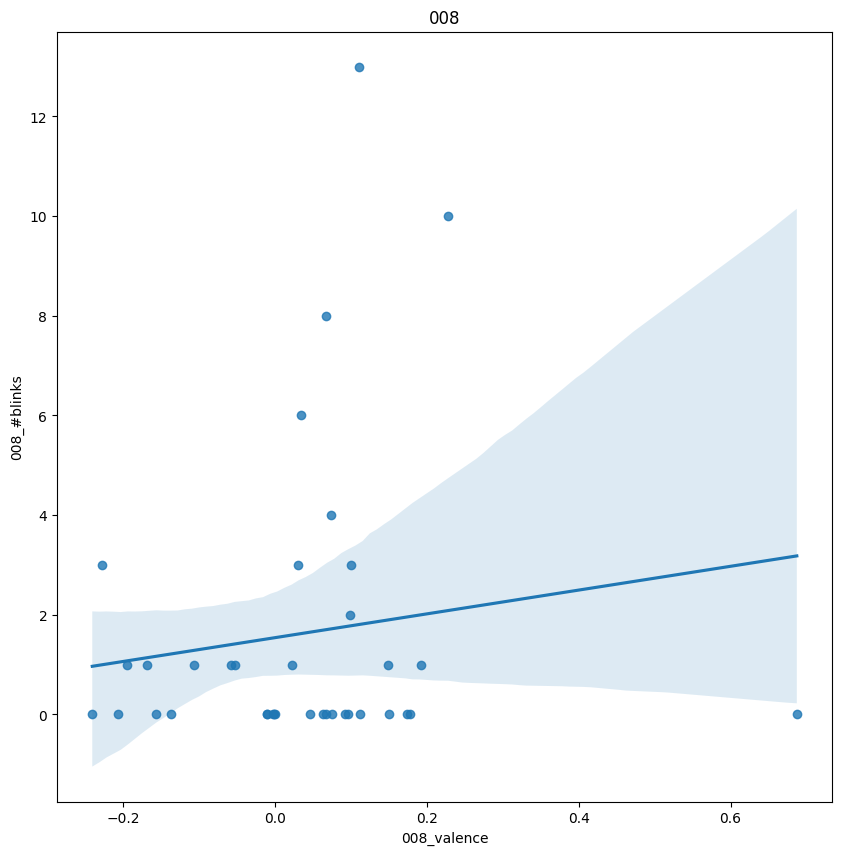

Corref 0.1317567806103655
P-Value 0.079408362930149


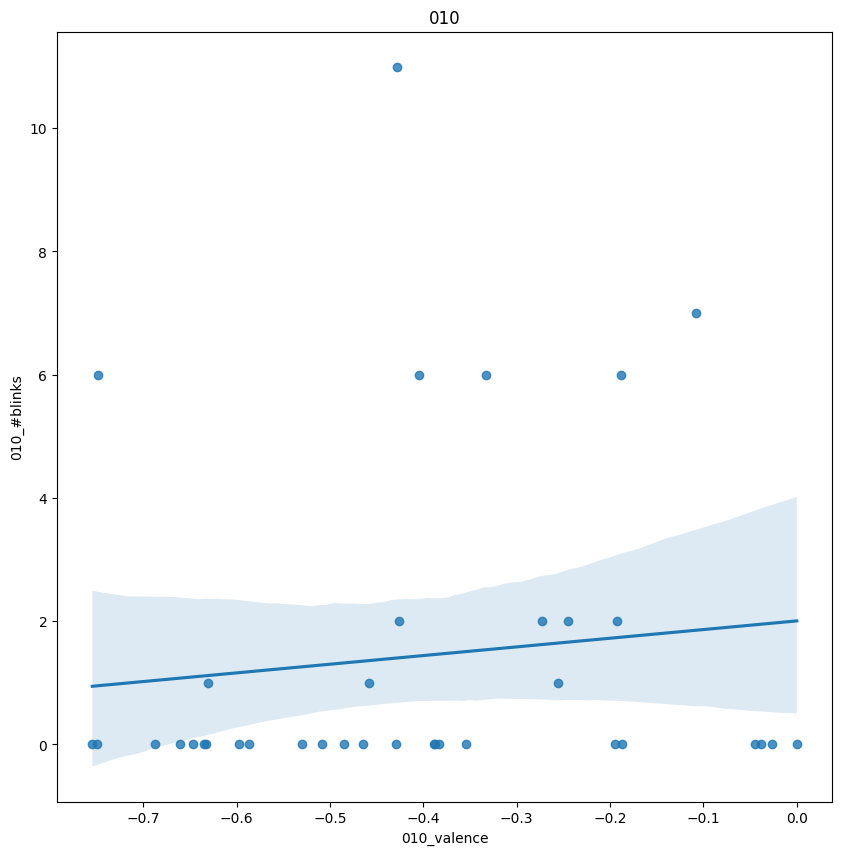

Corref 0.11587768903421429
P-Value 0.2114033247729389


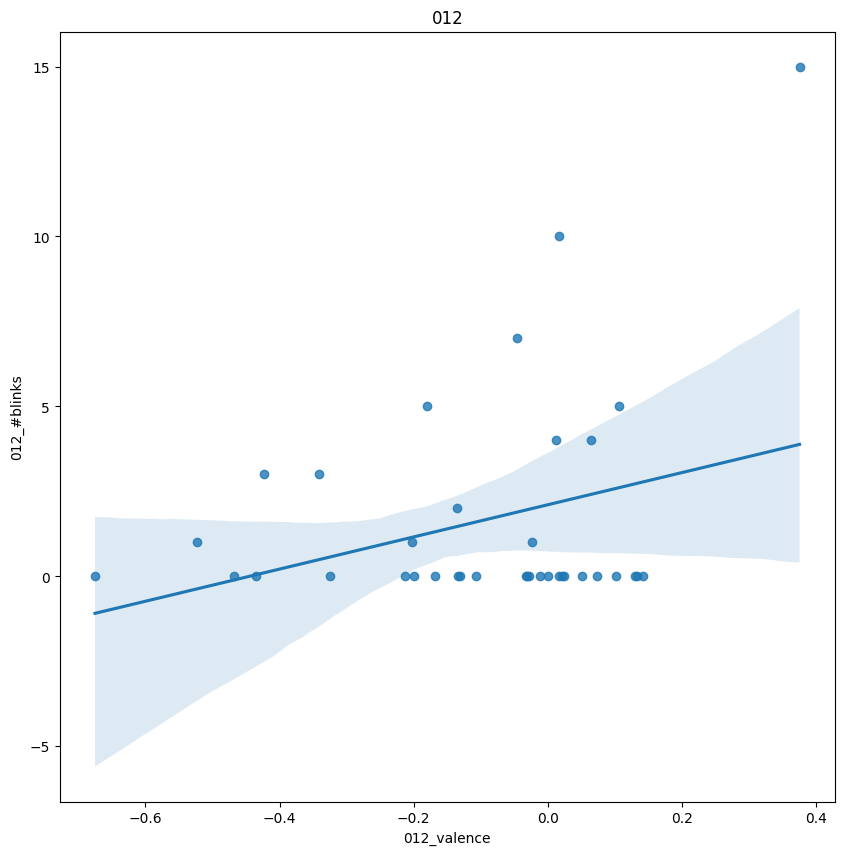

Corref 0.3149928669300571
P-Value 0.028092363106739092


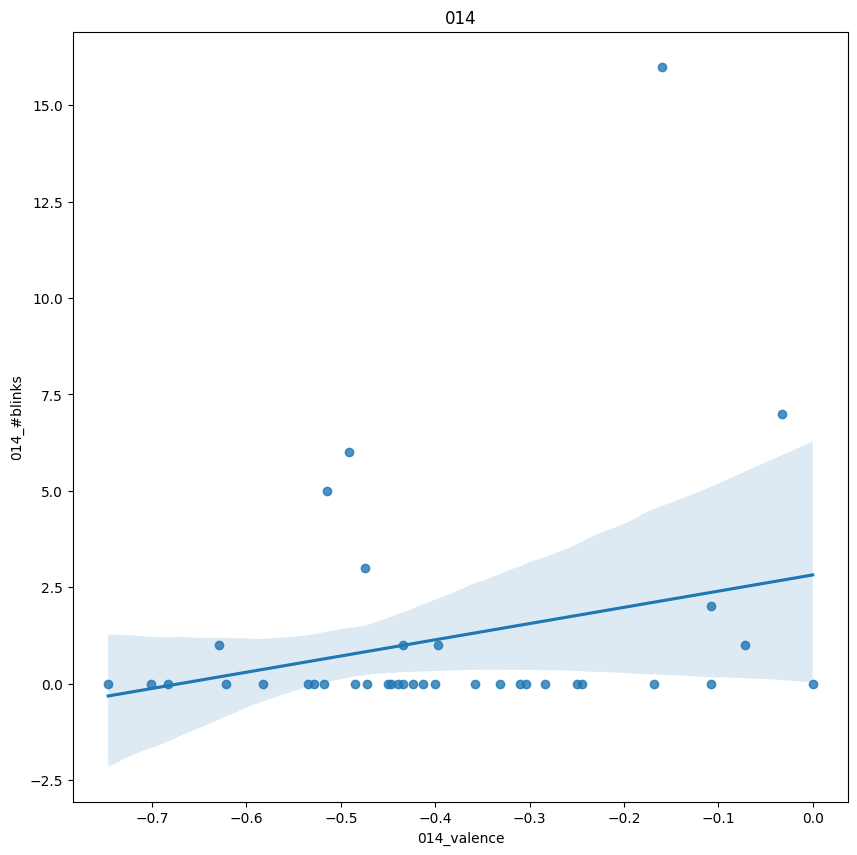

Corref 0.26171393682984406
P-Value 0.1647623300985151


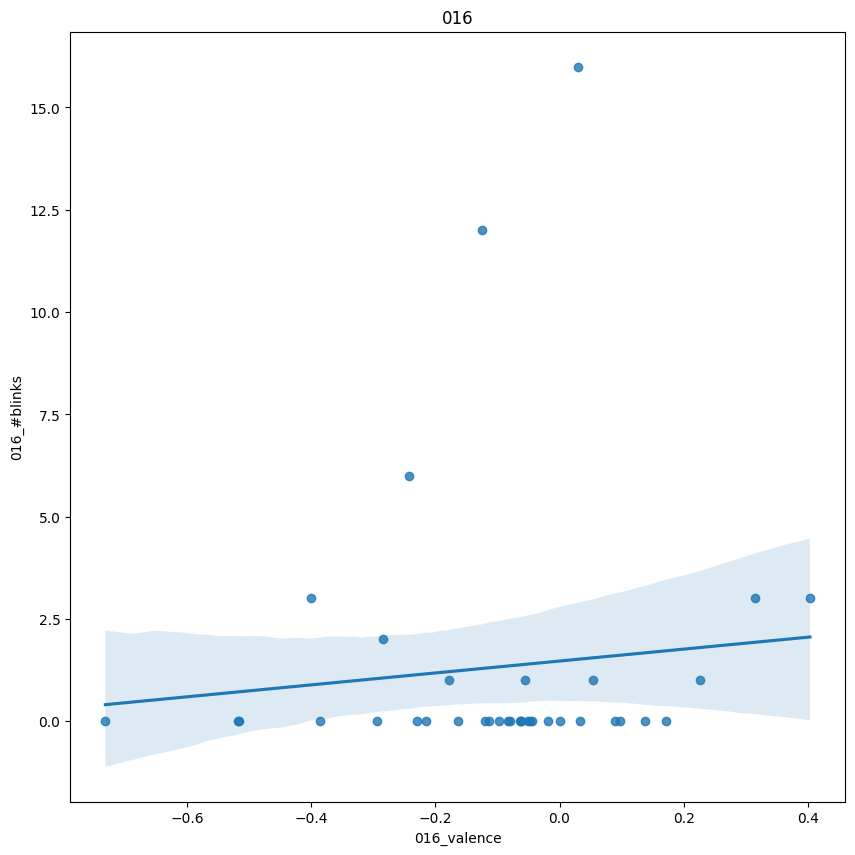

Corref 0.09910299793555243
P-Value 0.10279379171252358


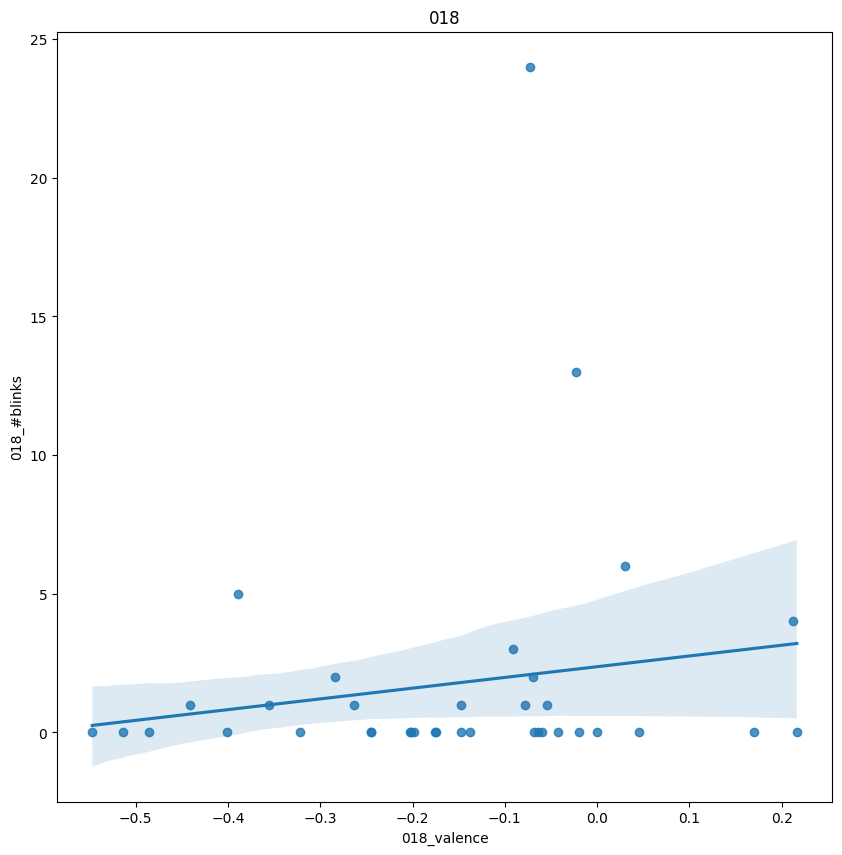

Corref 0.1627666633722849
P-Value 0.0972180912736634


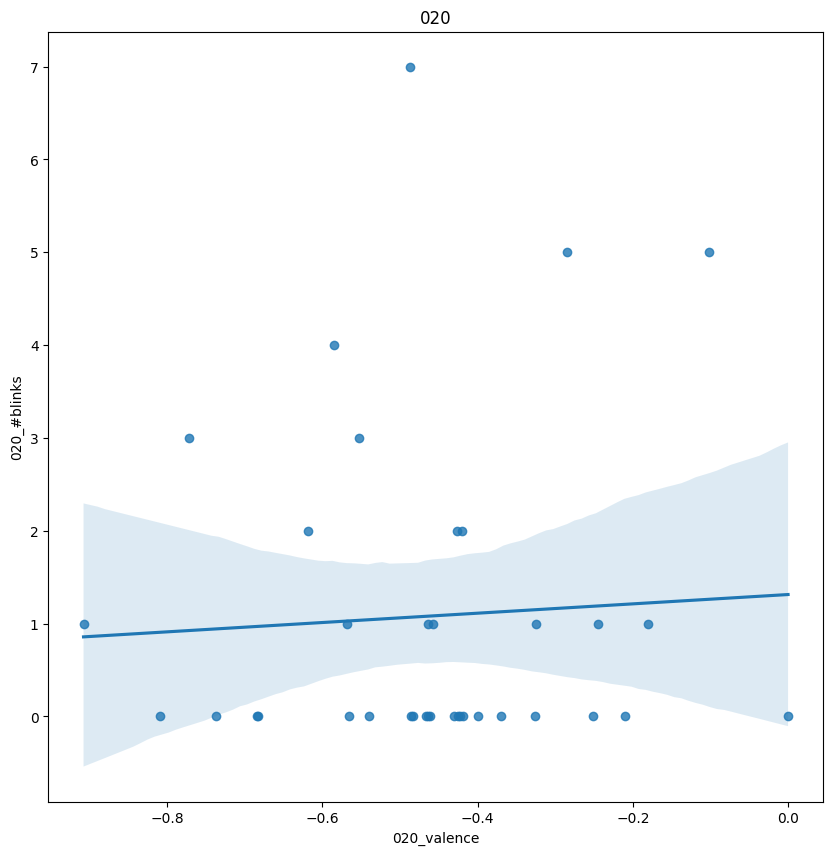

Corref 0.05563881123597426
P-Value -0.02357475880933214


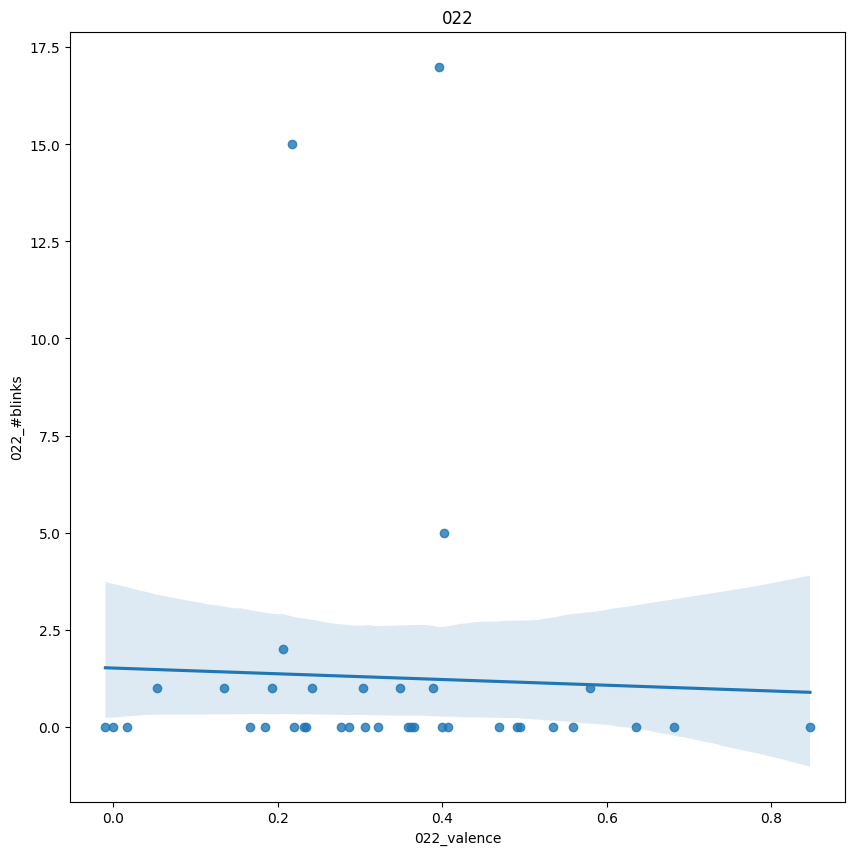

Corref -0.038177377773328365
P-Value -0.1510212343526281


In [109]:
def plot_correlation_valence(merged_plot):
    for column in merged_plot:
        if column.endswith('_valence'):
            plt.figure(figsize=(10, 10))
            sns.regplot(x=column, y=column.replace('_valence', '_#blinks'), data=merged_plot)
            plt.title(column.replace('_valence', ''))
            plt.show()
            print("Corref", merged_plot[column].corr(merged_plot[column.replace('_valence', '_#blinks')]))
            print("P-Value", merged_plot[column].corr(merged_plot[column.replace('_valence', '_#blinks')], method='spearman'))

plot_correlation_valence(merged_plot_valence)

<h3> One Plot </h3>

In [125]:
merged.corr().shape

(33, 33)

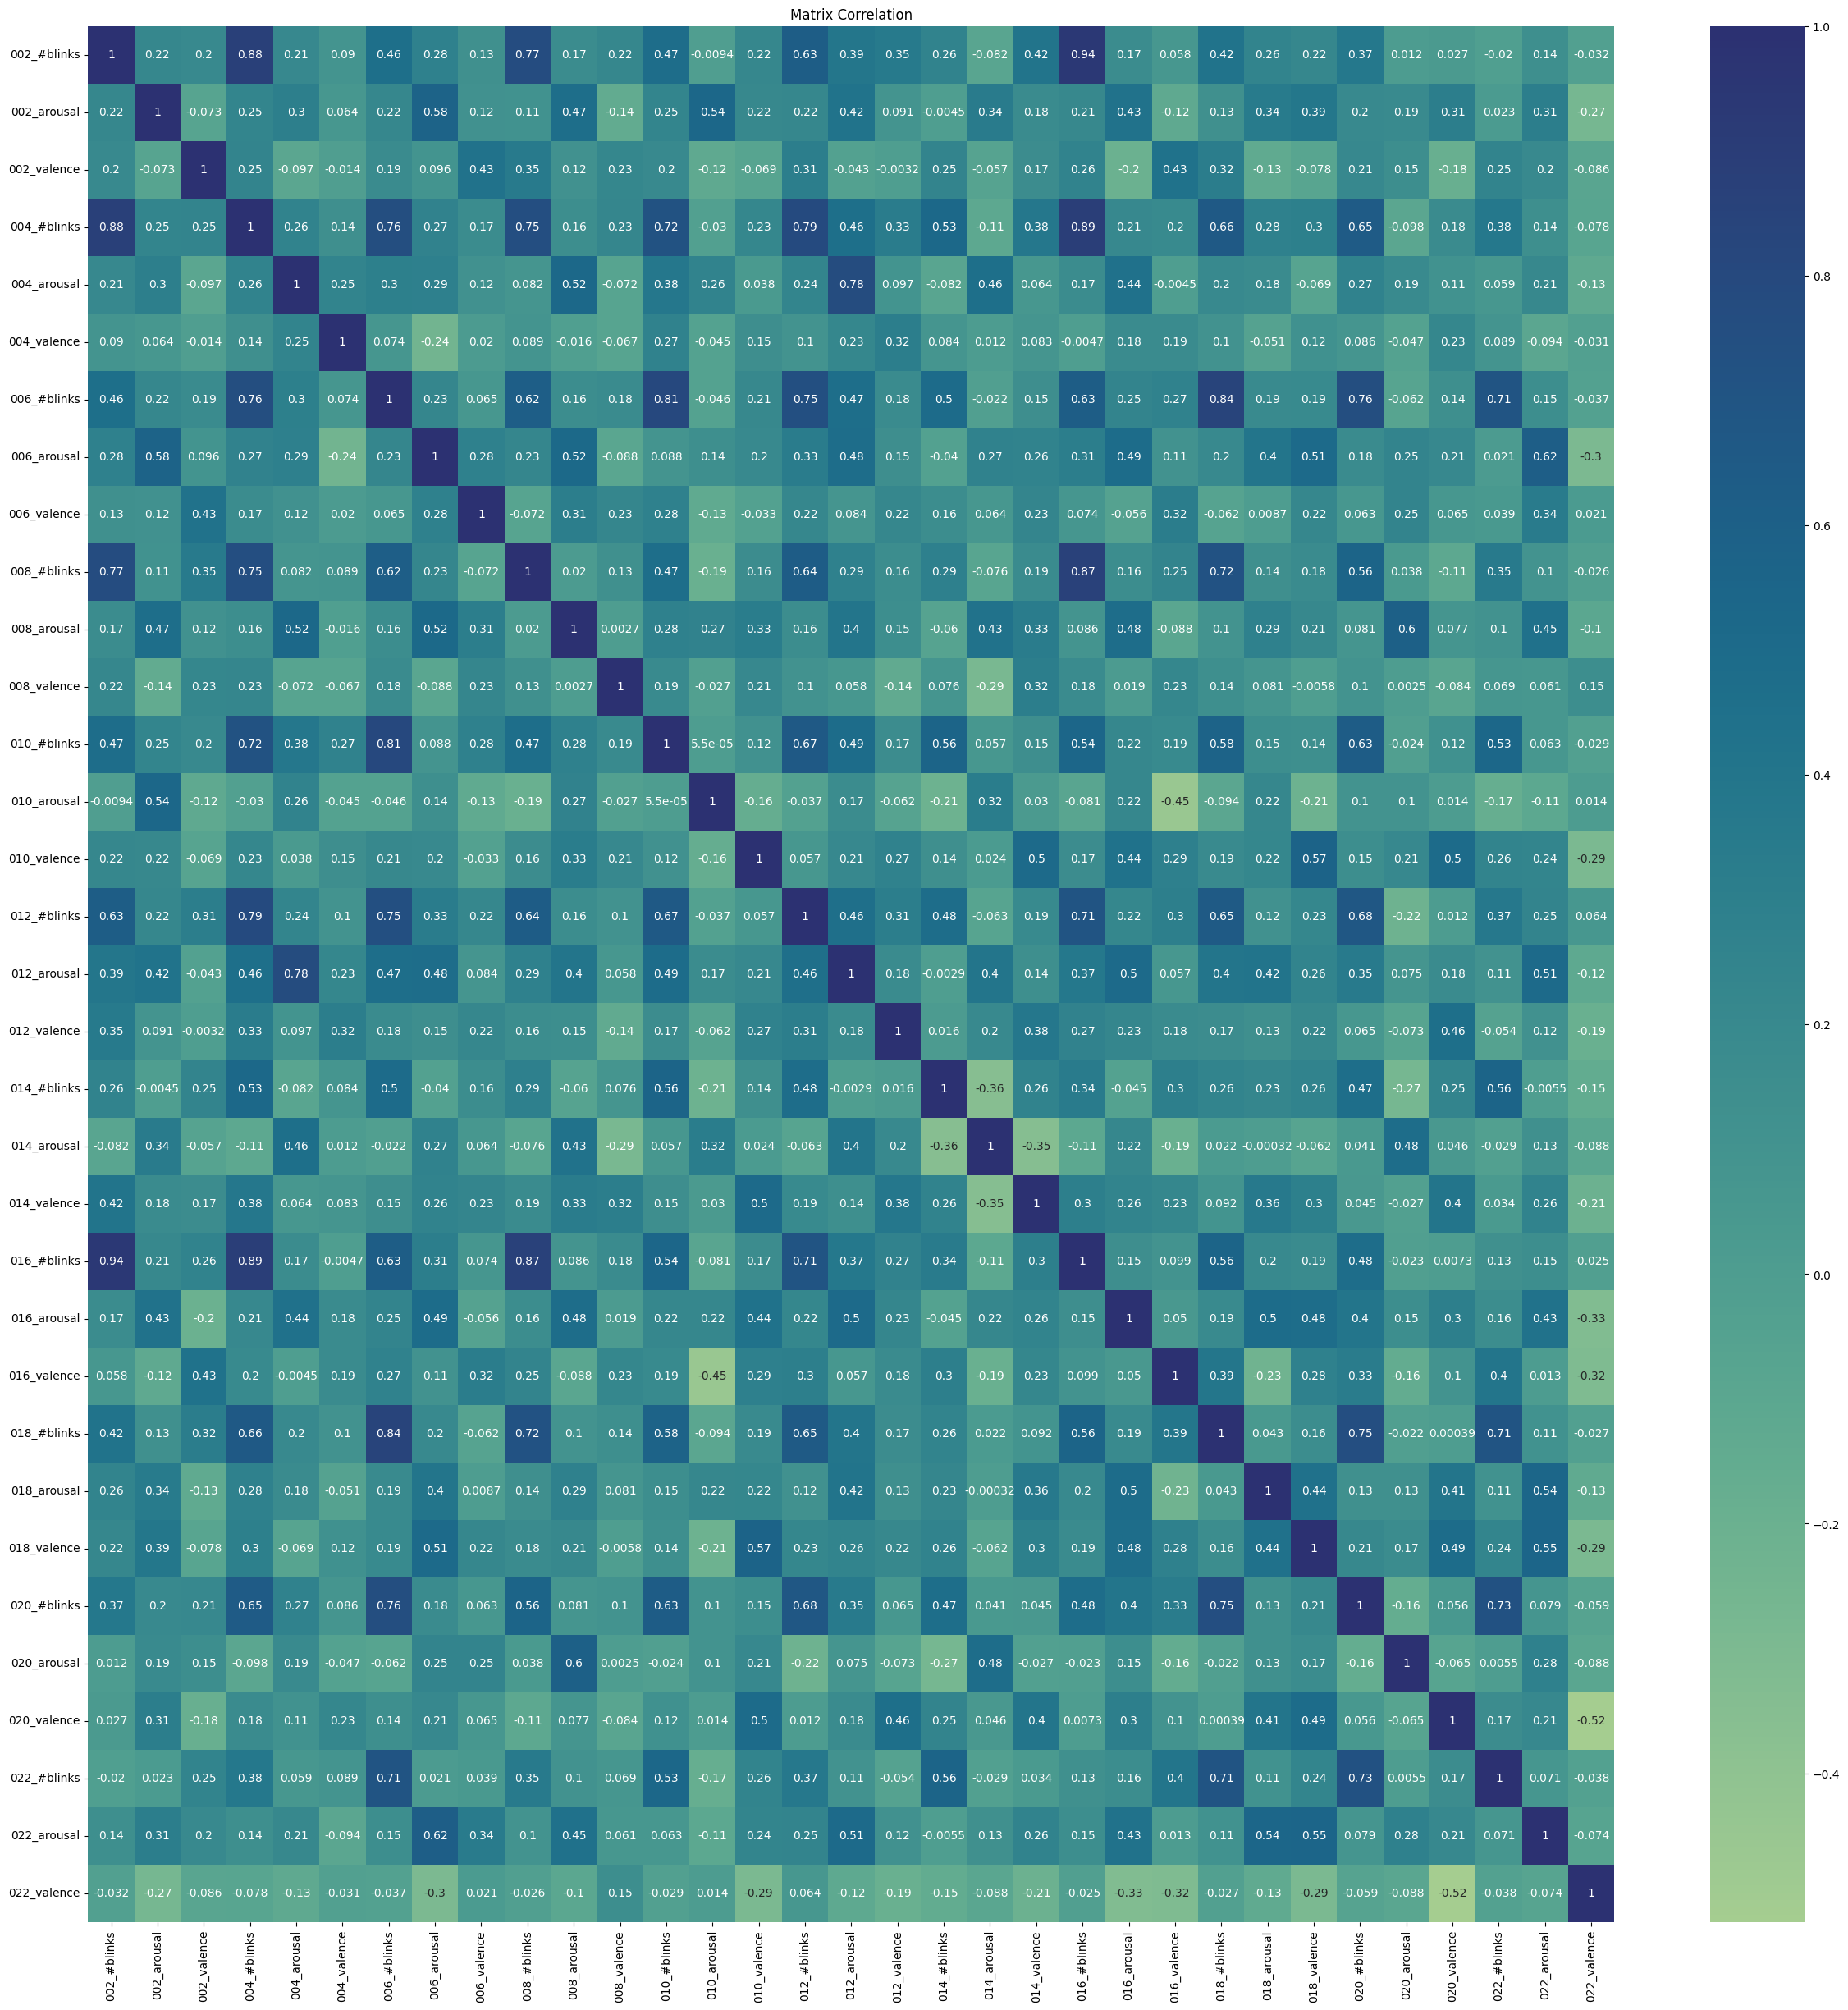

In [138]:
plt.figure(figsize=(30, 30))
sns.heatmap(merged.corr(), annot=True, cmap='crest')
plt.title('Matrix Correlation')
plt.show()